# Homework Midterm: 

In this assignment, we will be exploring tweets from several high profile Twitter users.  

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

### Rubric

In general, try to combine the analyses from earlier this semester or create new analysis based on the scaffolding we saw in class and on previous homeworks.

Each question is worth 4 points and will be graded based on this rubric:

| | 2 points | 1 point | 0 points |
|-----|-----|-----|-----|
| **Code** | Produces a mostly informative plot or pandas output that addresses the question posed in the student's description and uses at least one of the following pandas dataframe/series methods: `groupby`, `agg`, `merge`, `pivot_table`, `str`, `apply` | Attempts to produce a plot or manipulate data but the output is unrelated to the proposed question, or doesn't utilize at least one of the listed methods | No attempt at writing code |
| **Description** | Describes the analysis question and procedure comprehensively and summarizes results correctly | Attempts to describe analysis and results but description of results is incorrect or analysis of results is disconnected from the student’s original question | No attempt at writing a description |
### Score Breakdown

Question | Points
--- | ---
Part 1|4
Part 2|4
Part 3|4
Part 4|4
Part 5|4
**Total** | **20**

Before we begin:
## Which dataset did you choose?

what type of drug is the best in terms of emotional response, model the sentiment. focus on a few of the diseases, birth control, acne, depression

before that, we can look at rating, maybe rating over time, same condition how many different drugs are used

so were gonna make a new column with the sentiment score thing

we could look at the rating vs the sentiment

In [21]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

---
# Part 1: Data Preparation
**Hint:** the in class lab we went through which introduced EDA will be very helpful here


Now that we have obtained the data we want to understand its:

* **Structure** -- the "shape" of a data file
* **Granularity** -- how fine/coarse is each datum
* **Scope** -- how (in)complete is the data
* **Temporality** -- how is the data situated in time
* **Faithfulness** -- how well does the data capture "reality"

## Question: Structure
What format is the data in? 

<ol style="list-style-type: lower-alpha;">
    <li>CSV</li>
    <li>HTML</li>
    <li>JavaScript Object Notation (JSON)</li>
    <li>Excel XML</li>
</ol>

Pandas has built-in readers for many different file formats including the file format used here.  To learn more about these, check out the documentation for [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), [`pd.read_html`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html), [`pd.read_json`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html), and [`pd.read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).  

The data was originally in a TSV file (tab-separated values), but then we converted it to a CSV file.

In [22]:
# Import data
drugs = pd.read_csv('drugsComTrain_raw.csv', index_col=0)
drugs = drugs.rename_axis('id')
drugs.head()

,drugName,condition,review,rating,date,usefulCount
id,,,,,,
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


## Question: Granularity
**a)** What is the granularity of the data (i.e. what does each row represent)?   
**b)** Based on the granularity and the variables present in the data, what might some limitations of using this data be? What are two additional data categories/variables that you can collect to address some of these limitations?

The granularity of the data is individual reviews. Each row represents one review written by one patient.
Some limitations of using this data are that you can't determine if the patient was using the pharmaceutical that they reviewed correctly/according to their doctor's instructions, which would impact their experience of using it.

## Question: Scope
how (in)complete is the data?

Do variables have missing values? How can we quantify it?    
If there are missing values what are you dealing with it, what implications will it have?

## Question: Temporality
how is the data situated in time? Are there periodic patterns you expect wil emerge in the analysis?

The data is pretty complete -- there aren't many missing values. Some text irregularities in the "review" column were fixed using regular expressions.

The data spans a little less than 10 years. The first review dates back to April 1st, 2008, and the last review is from September 9, 2017. I don't expect to see any periodic trends because none of the data relate to a variable that could change over time.

## Question: Faithfulness
How well does the data capture "reality"?

What question do you want to answer with the data and which variable will you focus on to build a model around? In other words:    
What is your chosen target variable?

YOUR ANSWER HERE

---
# Part 2: Exploratory Data Analysis

In this section, we will make a series of exploratory visualizations and interpret them.

Note that we will perform EDA on the **training data** so that information from the test data does not influence our modeling decisions.


Begin by examining your target variable. Use some plotting tools that are informative of the distribution of the target variaple (e.g. a KDE, a histogram, a strip plot, or a box plot) also take a look at some descriptive statistics of this variable. Include a legend, xlabel, ylabel, and title. After creating the plot, look at it and make sure you understand what the plot is actually telling us,

/var/folders/yf/m10_kkm12wg1sd18gc0mp32c0000gn/T/ipykernel_4724/247403775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_control_data['date'] = pd.to_datetime(birth_control_data['date'])
/var/folders/yf/m10_kkm12wg1sd18gc0mp32c0000gn/T/ipykernel_4724/247403775.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_control_data['year'] = birth_control_data['date'].dt.year


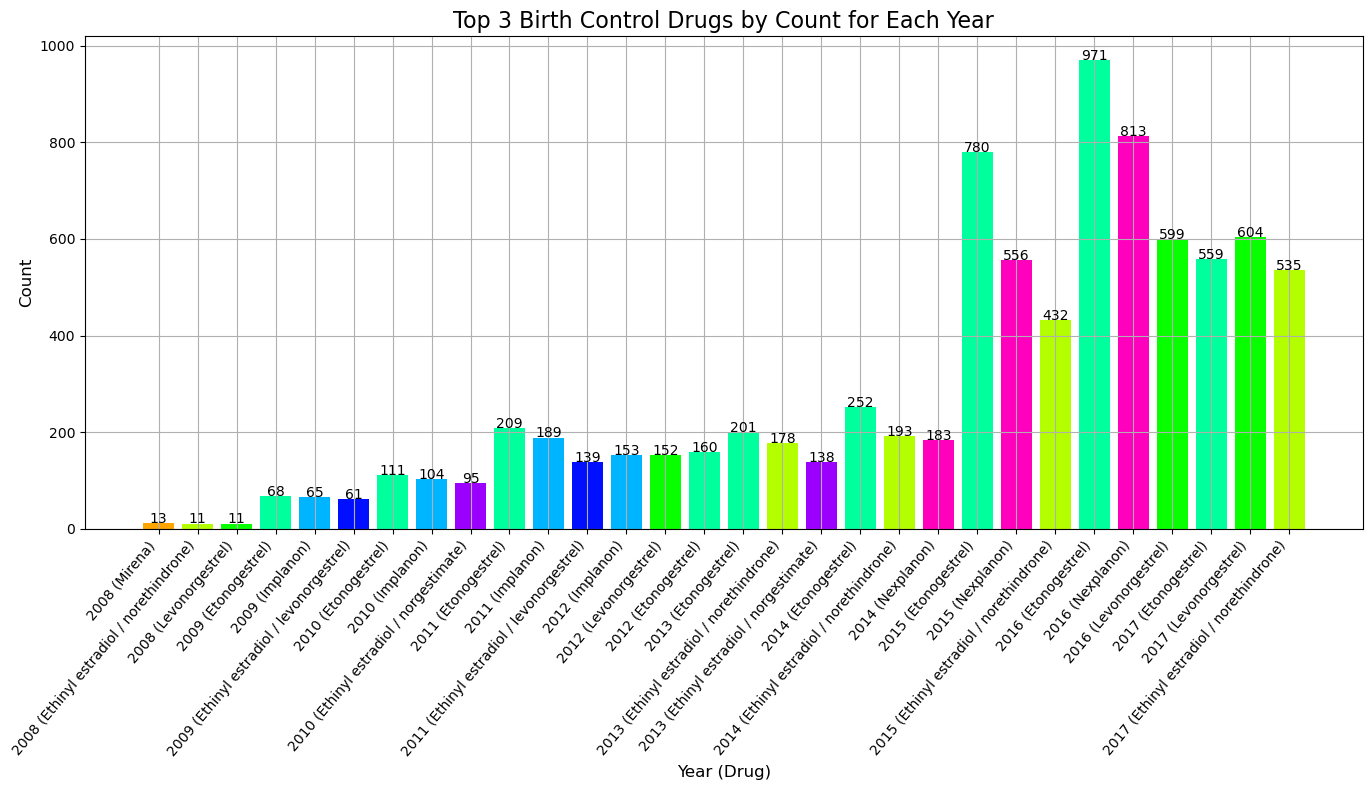

In [61]:
# Filter the data for 'Birth Control' condition and sort by date
birth_control_data = drugs[drugs['condition'] == 'Birth Control']

# Convert the 'date' column to datetime for easier manipulation
birth_control_data['date'] = pd.to_datetime(birth_control_data['date'])

# Group by drugName and calculate the average rating for each drug by year
birth_control_data['year'] = birth_control_data['date'].dt.year

# Group the data by year and drugName, calculating the count per year per drug
yearly_counts = birth_control_data.groupby(['year', 'drugName']).size().reset_index(name='count')

# For each year, get the top 3 drugs by count
top_3_by_count_per_year = yearly_counts.groupby('year').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Sort by year to ensure drugs are ordered chronologically
top_3_by_count_per_year = top_3_by_count_per_year.sort_values(by='year')

# Create a color palette for drugs
unique_drugs = top_3_by_count_per_year['drugName'].unique()
palette = sns.color_palette("hsv", len(unique_drugs))
colors = {drug: palette[i] for i, drug in enumerate(unique_drugs)}

# Create a bar plot with dynamic colors by drug name and count labels
plt.figure(figsize=(14, 8))

# Combine 'year' and 'drugName' to form x-axis labels
x_labels = top_3_by_count_per_year['year'].astype(str) + ' (' + top_3_by_count_per_year['drugName'] + ')'

plt.bar(x_labels, top_3_by_count_per_year['count'], color=[colors[drug] for drug in top_3_by_count_per_year['drugName']])

# Add count labels
for i, count in enumerate(top_3_by_count_per_year['count']):
    plt.text(i, count + 0.05, f'{count}', ha='center')

# Set the x-ticks to be ordered by year with drugs grouped under each year
plt.title('Top 3 Birth Control Drugs by Count for Each Year', fontsize=16)
plt.xlabel('Year (Drug)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=50, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

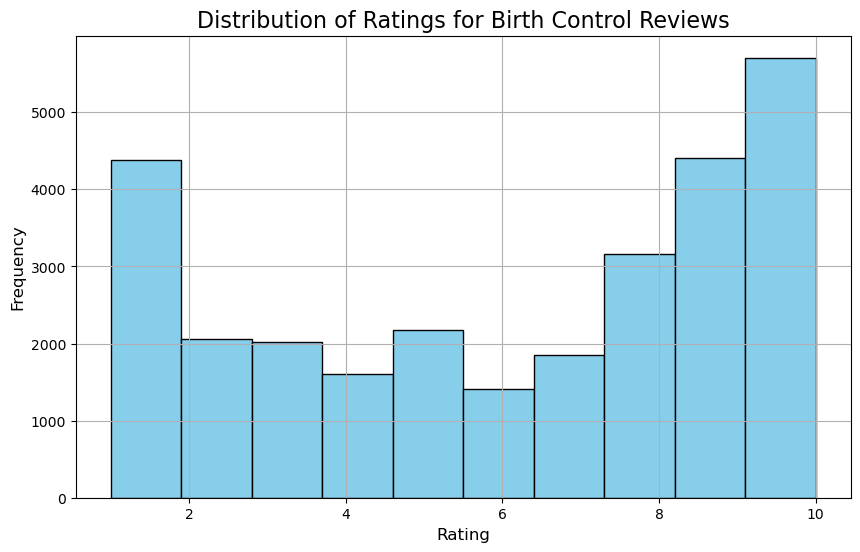

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(birth_control_data['rating'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of Ratings for Birth Control Reviews', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

## Question

What can you say about your target variable from these initial analysis?

## Question
Use sns.histplot or any other function of your choice to create a plot that overlays two or more groups of variables. Remember to keep the granularity of the two data sets consistent.

**a)** How do the groups compare to one another?

The density plots do not show us how the counts for registered and casual riders vary together use a scatter plot to investigate the relationship between casual and registered counts. 

**b)** How do the groups compare to one another now?

YOUR ANSWER HERE

---
# Part 3: Feature Engineering
A few of the variables that encode categorical data and other qualitative.   
Use one of techniques we saw in class to create a new variable.

**a)** What type of transformation did you use?   
**b)** Why did you make this decision?


We made a new variable for sentiment analysis to assess the reviews for each of the drugs 

In [26]:
# Load in vader data for assessment of polarity 
sentiment = pd.read_csv("vader_lexicon.txt", sep='\t', index_col=0, usecols=[0, 1], names=['token', 'polarity'])
sentiment.head()

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [27]:
# Clean reviews column
punct_re = r"[^\w\s]" 

drugs['clean_text'] = drugs['review'].str.lower()
drugs['clean_text'] = drugs['clean_text'].str.replace("&#039;", "", regex=True) #    &#039; = '
drugs['clean_text'] = drugs['clean_text'].str.replace(punct_re, "", regex=True)

drugs.head()

,drugName,condition,review,rating,date,usefulCount,clean_text
id,,,,,,,
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,it has no side effect i take it in combination...
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,my son is halfway through his fourth week of i...
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,i used to take another oral contraceptive whic...
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,this is my first time using any form of birth ...
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,suboxone has completely turned my life around ...


In [28]:
# Create table with individual words of each review to make sentiments easier to calculate
tidy_drugs = (
        drugs["clean_text"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text": "word"})
    )
tidy_drugs

,word
id,
206461,it
206461,has
206461,no
206461,side
206461,effect
...,...
215220,its
215220,a
215220,miracle


In [29]:
# Add polarity 
drugs["polarity"] = (
        tidy_drugs
        .merge(sentiment, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['id', 'polarity']]
        .groupby('id')
        .sum()
        .fillna(0)
    )

drugs

,drugName,condition,review,rating,date,usefulCount,clean_text,polarity
id,,,,,,,,
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,it has no side effect i take it in combination...,-1.2
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,my son is halfway through his fourth week of i...,8.9
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,i used to take another oral contraceptive whic...,3.2
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,this is my first time using any form of birth ...,4.0
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,suboxone has completely turned my life around ...,10.7
...,...,...,...,...,...,...,...,...
191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125,i wrote my first report in midoctober of 2014 ...,13.2
127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34,i was given this in iv before surgey i immedia...,-2.1
187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35,limited improvement after 4 months developed b...,-4.3


---
# Part 4: Modeling

We've reached the point where we can specify a model. But first, we will load a fresh copy of the data, just in case our code above produced any undesired side-effects. Run the cell below to store a fresh copy of the data from `ames_train.csv` in a dataframe named `full_data`. We will also store the number of rows in `full_data` in the variable `full_data_len`.

## Question: the model
What model are you fitting? Why? How did you choose it?

## Question: Cross Validation
Now, let's split the data set into a training set and a validation set. We will use the training set to fit our model's parameters, and we will use the validation set to estimate how well our model will perform on unseen data drawn from the same distribution. If we used all the data to fit our model, we would not have a way to estimate model performance on unseen data.

## Question: Loss function
Choose a the loss function, why did you make this decision?

## Question: The quality of the model
Is your model good at predicting your target variable?    
What is your test error? your validation error? your training error?   

What did you do to improve these measures?    
    - increase number of variables    
    - add a penalty    
    - increase complexity of the model    

What is your model bias? What is your model's variance? 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import mord as m
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss  # Import log_loss for cross-entropy calculation

full_data = drugs

# Dropping any rows that are missing polarity or rating
full_data = full_data.dropna(subset=['polarity', 'rating'])

# Filtering for birth control
birth_control_data = full_data[full_data['condition'] == 'Birth Control']

# Feature Selection (polarity as the feature, rating as the target)
X = birth_control_data[['polarity']]
y = birth_control_data['rating']

# Train-Test Split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Scaling the polarity feature
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ordinal Logistic Regression model
model = m.LogisticAT()  # LogisticAT is the ordinal logistic model from mord

# Train the model
model.fit(X_train, y_train)

# Get predicted probabilities for each class on test set
y_prob_test = model.predict_proba(X_test)

# Calculate Cross-Entropy Loss (Log Loss) for test set
cross_entropy_loss = log_loss(y_test, y_prob_test)
print(f"Cross-Entropy Loss: {cross_entropy_loss:.4f}")

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Mean Squared Error (using predicted ratings on test set)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error (Test): {rmse_test:.2f}")

# Calculate predictions on training data for training error
y_pred_train = model.predict(X_train)

# Mean Squared Error for training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print(f"Root Mean Squared Error (Training): {rmse_train:.2f}")

# Visuals: Plot Actual Ratings vs Predicted Ratings for test set
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (Ordinal Logistic Regression) - Test Set')
plt.show()

ModuleNotFoundError: No module named 'mord'

---
# Part 5: Summarizing your results

In conclusion, what was your question and how did you anwer it using your analysis

YOUR ANSWER HERE